# --- 기술 통계 및 EDA ---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 폰트깨짐 현상 해결
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

In [5]:
df_seoul2=pd.read_csv('preprocessing_final.csv')

In [ ]:
df_seoul2.drop(['거주지역_시도','거주지역_시군구'], axis=1, inplace=True)

In [62]:
df_seoul2

,년월,카드이용지역,업종명,연령대,성별,이용금액_원,날짜,외부인의_결제여부
0,201901,강남구,건강보조식품 소매업,60,F,1181300,2019-01-01,0
1,201901,강남구,건강보조식품 소매업,50,F,756000,2019-01-01,0
2,201901,강남구,건강보조식품 소매업,50,F,2480710,2019-01-01,0
3,201901,강남구,건강보조식품 소매업,60,F,3604450,2019-01-01,0
4,201901,강남구,건강보조식품 소매업,50,F,1952750,2019-01-01,0
...,...,...,...,...,...,...,...,...
6259497,202003,중랑구,화장품 및 방향제 소매업,40,F,25800,2020-03-01,0
6259498,202003,중랑구,화장품 및 방향제 소매업,50,M,231700,2020-03-01,0
6259499,202003,중랑구,화장품 및 방향제 소매업,50,F,288700,2020-03-01,0
6259500,202003,중랑구,화장품 및 방향제 소매업,60,M,69600,2020-03-01,0


In [63]:
# 날짜를 datetime으로 변환하여 to_csv로 내보내도 다시 불러오면 object가 되어 있음
df_seoul2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259502 entries, 0 to 6259501
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   년월         int64         
 1   카드이용지역     object        
 2   업종명        object        
 3   연령대        int64         
 4   성별         object        
 5   이용금액_원     int64         
 6   날짜         datetime64[ns]
 7   외부인의_결제여부  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 382.0+ MB


In [8]:
# 다시 날짜를 datetime으로 변환
df_seoul2["날짜"] = pd.to_datetime(df_seoul2['날짜'])
df_seoul2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259502 entries, 0 to 6259501
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   년월         int64         
 1   카드이용지역     object        
 2   업종명        object        
 3   거주지역_시도    object        
 4   거주지역_시군구   object        
 5   연령대        object        
 6   성별         object        
 7   이용금액_원     int64         
 8   날짜         datetime64[ns]
 9   외부인의_결제여부  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 477.6+ MB


In [9]:
# 연령대를 int로 바꿔서 기술통계 확인
df_seoul2['연령대'] = df_seoul2['연령대'].str.rstrip('s').astype('int')

In [10]:
df_seoul2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259502 entries, 0 to 6259501
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   년월         int64         
 1   카드이용지역     object        
 2   업종명        object        
 3   거주지역_시도    object        
 4   거주지역_시군구   object        
 5   연령대        int64         
 6   성별         object        
 7   이용금액_원     int64         
 8   날짜         datetime64[ns]
 9   외부인의_결제여부  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 477.6+ MB


In [11]:
df_seoul2.describe().round(2)

,년월,연령대,이용금액_원,외부인의_결제여부
count,6259502.00,6259502.00,6.259502e+06,6259502.00
mean,201923.46,37.40,2.344776e+06,0.04
std,36.59,14.73,1.369219e+07,0.19
min,201901.00,10.00,2.000000e+01,0.00
25%,201904.00,30.00,1.015000e+05,0.00
50%,201908.00,40.00,3.000000e+05,0.00
75%,201911.00,50.00,1.032000e+06,0.00
max,202003.00,70.00,8.796722e+08,1.00


### 기술 통계 분석(서울시)
- 서울시 신용카드 이용고객 평균 연령대는 37.4세
- 서울시 신용카드 평균 이용금액은 2,344,776원

In [91]:
df_seoul2.columns

Index(['년월', '카드이용지역', '업종명', '연령대', '성별', '이용금액_원', '날짜', '외부인의_결제여부'], dtype='object')

In [86]:
df_home = df_seoul2.groupby(['외부인의_결제여부'], as_index = False).sum()

In [88]:
df_home.sort_values(by='이용금액_원', ascending = False)

,외부인의_결제여부,년월,연령대,이용금액_원
0,0,1218110578742,225241920,9301726390602
1,1,45829733030,8856370,5375404658429


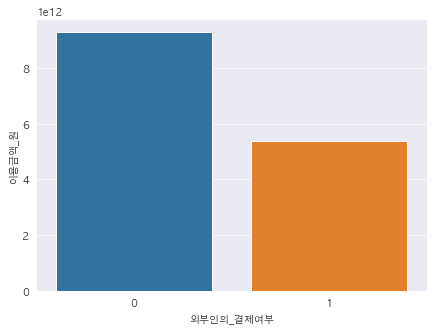

In [90]:
plt.figure(figsize=(7,5))
sns.barplot(x='외부인의_결제여부', y='이용금액_원', data=df_home)

In [100]:
df_location = df_seoul2.groupby(['카드이용지역'], as_index = False).sum()

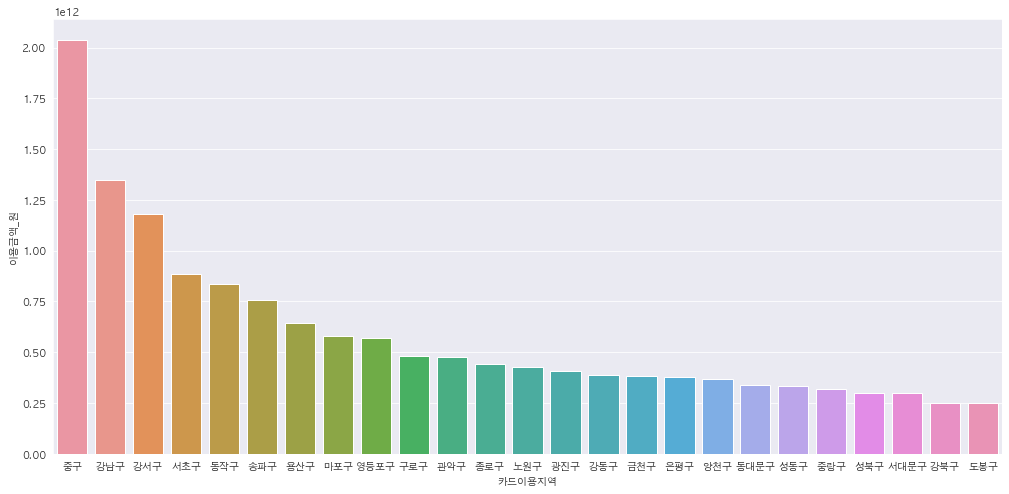

In [102]:
df_location = df_location.sort_values(by='이용금액_원', ascending = False)
plt.figure(figsize=(17,8))
sns.barplot(x='카드이용지역', y='이용금액_원', data=df_location)

### 중구 > 강남구 > 강서구 순으로 카드이용 총액이 높다.

In [94]:
df_class = df_seoul2.groupby(['업종명'], as_index = False).sum()

In [95]:
df_class

,업종명,년월,연령대,이용금액_원,외부인의_결제여부
0,건강보조식품 소매업,3951601244,907000,20711373484,5119
1,골프장 운영업,814963264,206980,4841893035,218
2,과실 및 채소 소매업,18695630988,4265660,110331062192,8149
3,관광 민예품 및 선물용품 소매업,4192244139,723580,3346798725,2010
4,그외 기타 스포츠시설 운영업,396779299,67280,606067892,1023
5,그외 기타 종합 소매업,36407894674,6950260,575867310193,6486
6,기타 대형 종합 소매업,74429956390,14090530,1503331451777,9919
7,기타 수상오락 서비스업,123575851,18540,98481050,510
8,기타 외국식 음식점업,38625728535,7167030,152352172953,9308
9,기타 주점업,3790085939,738170,30558286808,4854


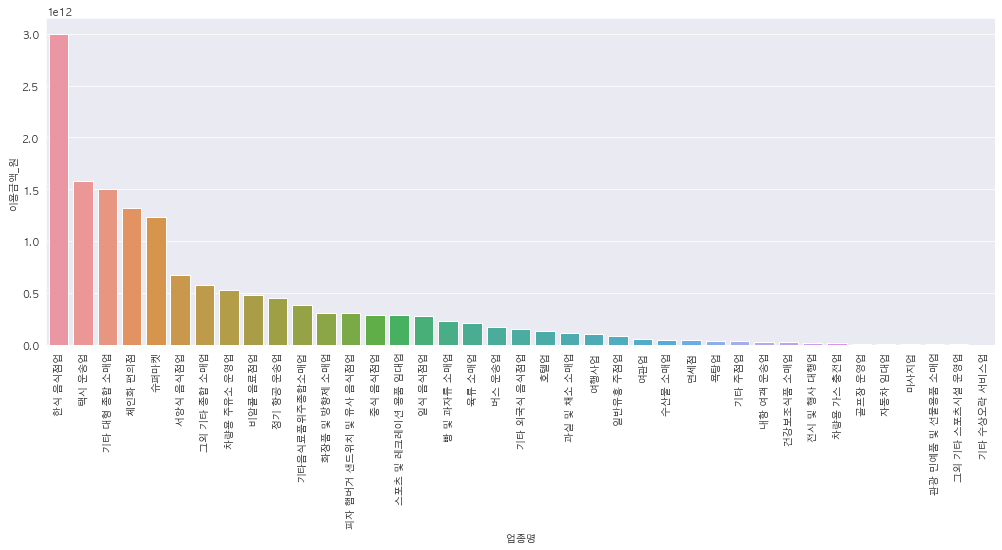

In [103]:
df_class = df_class.sort_values(by='이용금액_원', ascending = False)
plt.figure(figsize=(17,6))
plt.xticks(rotation = 90)
sns.barplot(x='업종명', y='이용금액_원', data=df_class)

### 한식 음식점업 > 택시 운송업 > 기타 대형 종합 소매업 > 체인화 편의점 순으로 매출액이 높다고 보여진다.

In [23]:
df_class_2 = df_seoul2.groupby(['업종명'], as_index = False).mean()

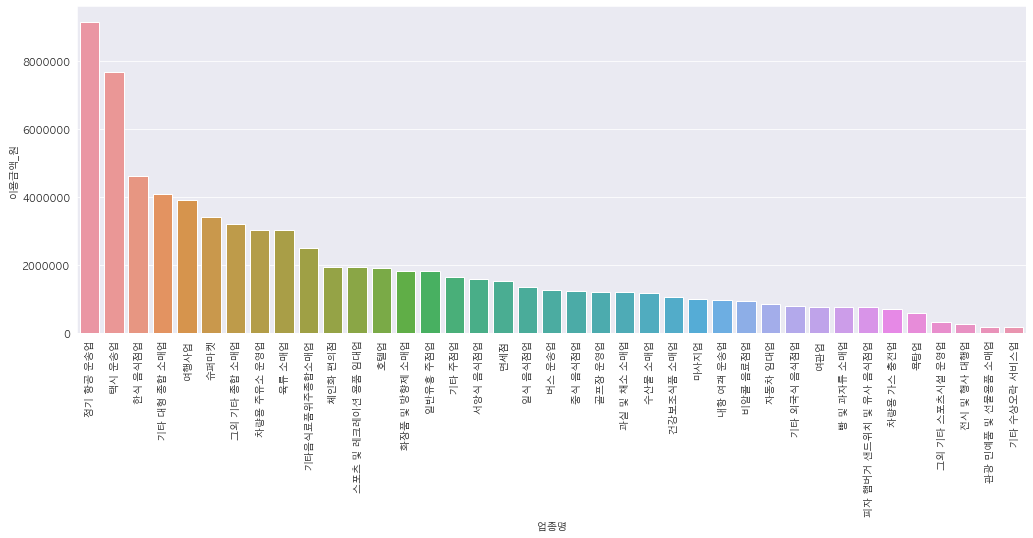

In [104]:
df_class_2 = df_class_2.sort_values(by='이용금액_원', ascending = False)
plt.figure(figsize=(17,6))
plt.xticks(rotation = 90)
sns.barplot(x='업종명', y='이용금액_원', data=df_class_2)

### 정기 항공 운송업 > 택시 운송업 > 한식 음식점업 > 기타 대형 종합 소매업 순으로 평균 매출액이 높다고 보여진다.

In [27]:
df_class_age = df_seoul2.groupby(['업종명','연령대'], as_index = False).sum()

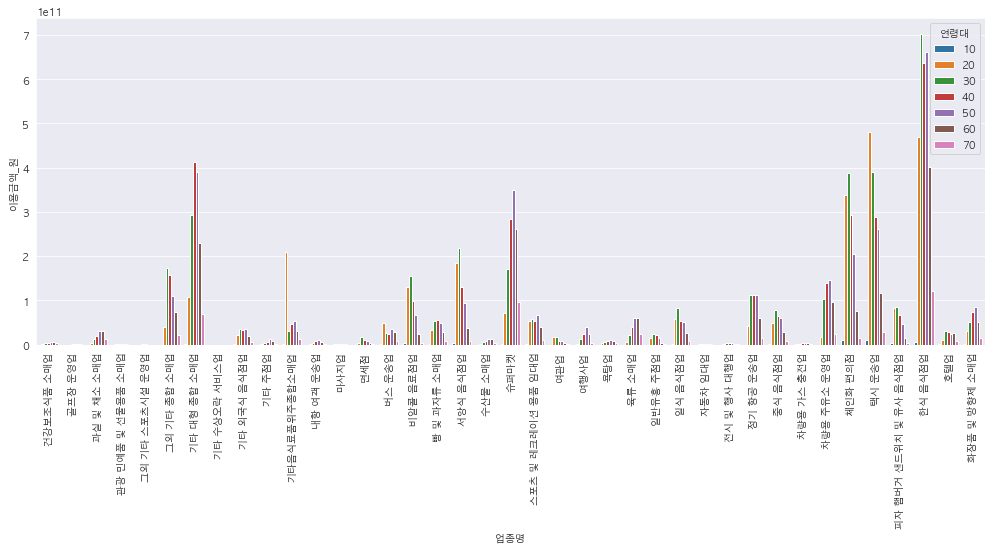

In [69]:
plt.figure(figsize=(17,6))
plt.xticks(rotation=90)
sns.barplot(x='업종명', y='이용금액_원', data=df_class_age, hue='연령대')

In [29]:
df_class_age['업종명'].value_counts().index

Index(['기타 주점업', '체인화 편의점', '스포츠 및 레크레이션 용품 임대업', '차량용 주유소 운영업',
       '기타 대형 종합 소매업', '일식 음식점업', '여행사업', '기타 외국식 음식점업', '택시 운송업', '내항 여객 운송업',
       '서양식 음식점업', '호텔업', '건강보조식품 소매업', '그외 기타 스포츠시설 운영업', '화장품 및 방향제 소매업',
       '중식 음식점업', '육류 소매업', '일반유흥 주점업', '욕탕업', '정기 항공 운송업', '빵 및 과자류 소매업',
       '비알콜 음료점업', '과실 및 채소 소매업', '슈퍼마켓', '여관업', '차량용 가스 충전업', '한식 음식점업',
       '그외 기타 종합 소매업', '관광 민예품 및 선물용품 소매업', '수산물 소매업', '전시 및 행사 대행업', '면세점',
       '기타음식료품위주종합소매업', '버스 운송업', '피자 햄버거 샌드위치 및 유사 음식점업', '자동차 임대업',
       '골프장 운영업', '마사지업', '기타 수상오락 서비스업'],
      dtype='object')

In [30]:
df_class_age['업종명'].nunique()

39

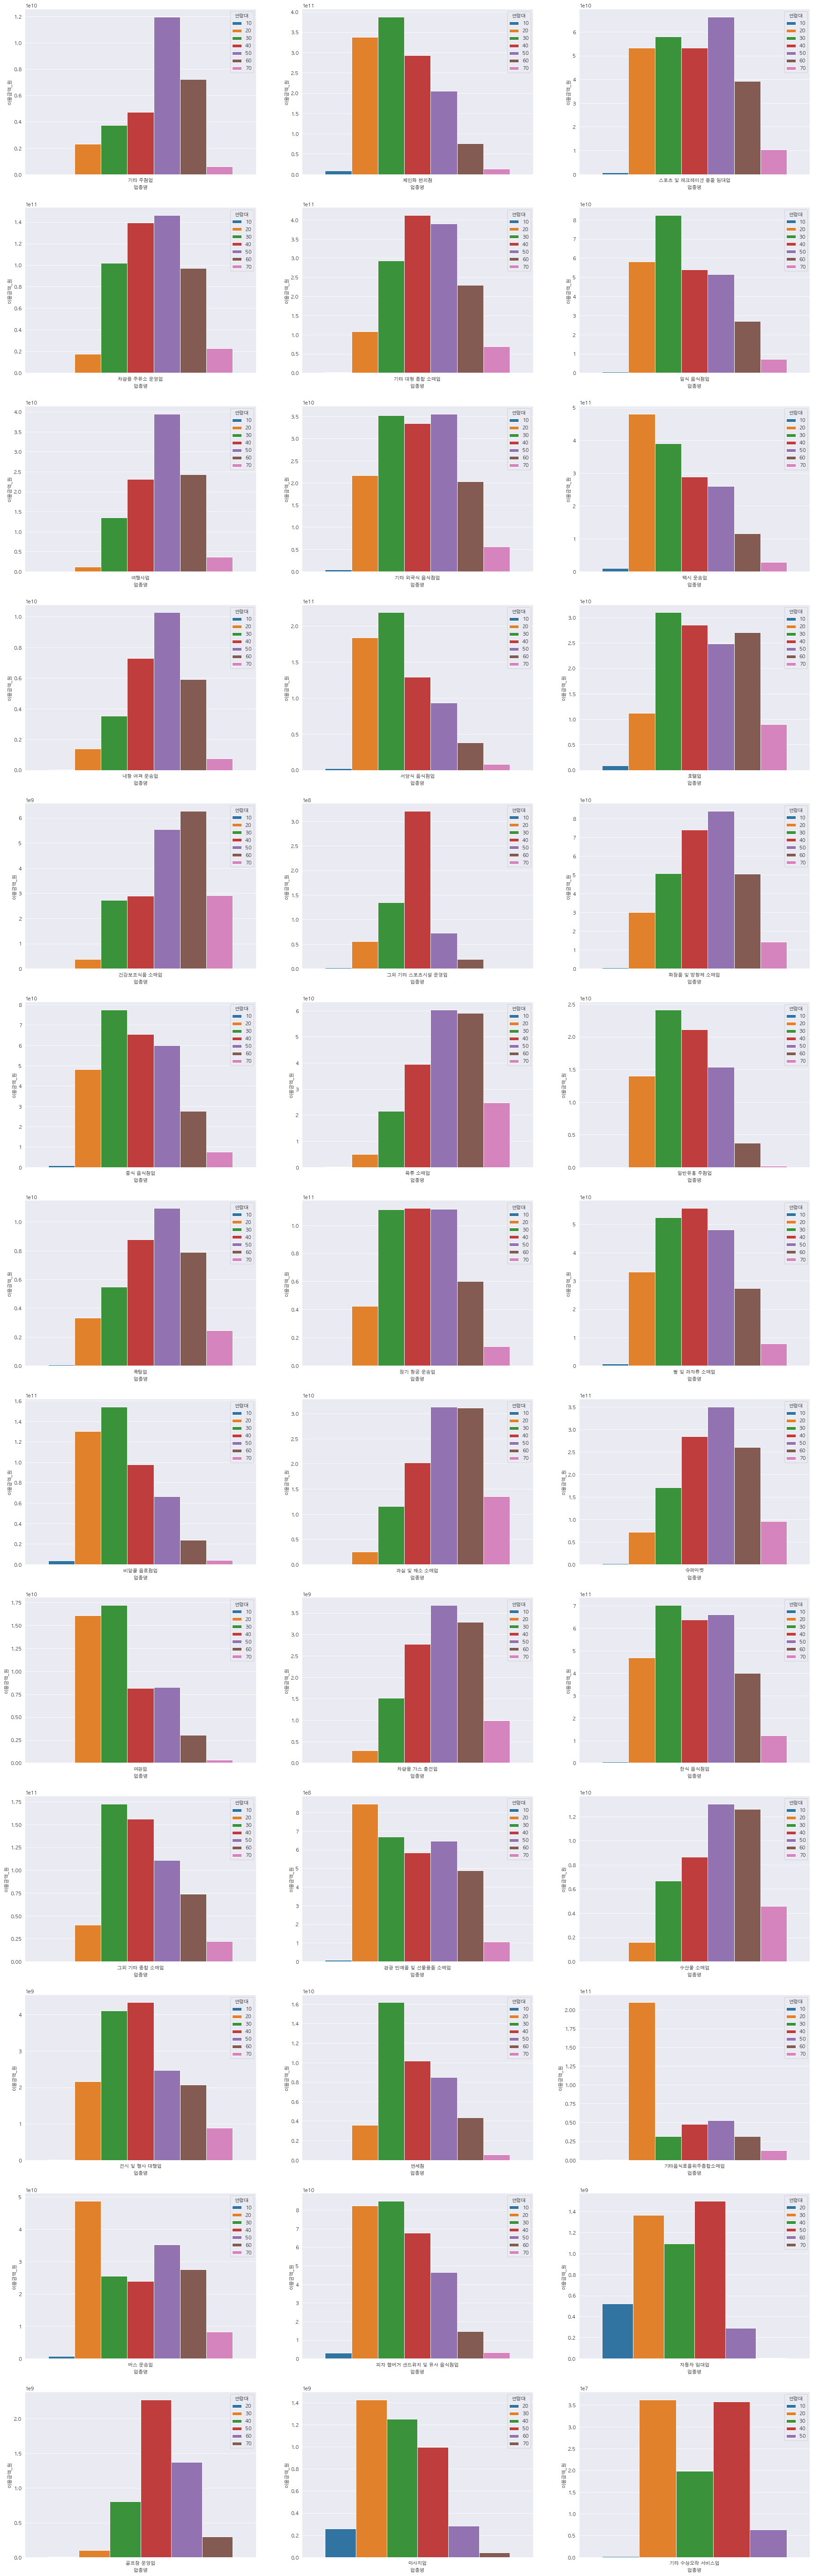

In [31]:
card_class = df_class_age['업종명'].value_counts().index

fig , axes = plt.subplots(13,3)
axx = axes.flatten()
fig.set_size_inches(30,100)
i = 0

for card_class in card_class:
    plot_data = df_class_age[df_class_age['업종명'] == card_class]
    sns.barplot(data = plot_data, x = '업종명', y = '이용금액_원', hue = '연령대',ci = None, ax = axx[i])
    i += 1

In [32]:
df_age_2 = df_seoul2.groupby(['연령대', '성별'], as_index = False).mean()

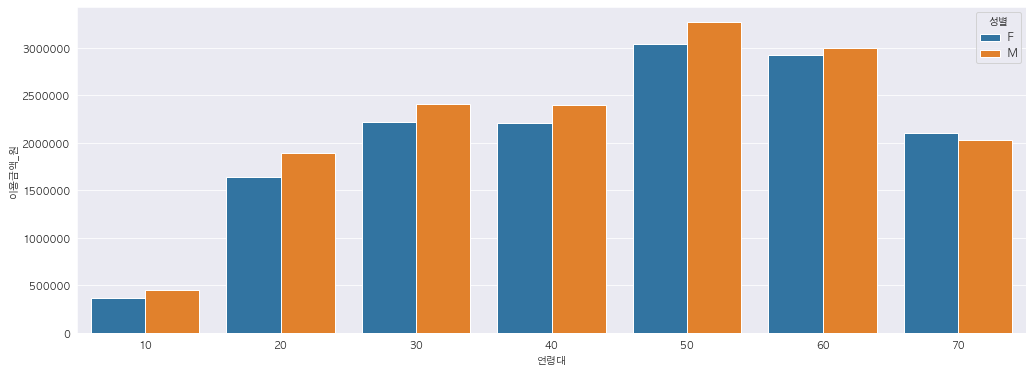

In [70]:
plt.figure(figsize=(17,6))
sns.barplot(x='연령대', y='이용금액_원', data=df_age_2, hue='성별')

### 연령대별 평균 이용총액은 50대가 가장높다고 보여진다.

In [34]:
df_date = df_seoul2.groupby(['날짜','연령대'], as_index = False).sum()

In [35]:
df_date

,날짜,연령대,년월,이용금액_원,외부인의_결제여부
0,2019-01-01,10,1043828170,1500285413,696
1,2019-01-01,20,18671400678,154903837870,2282
2,2019-01-01,30,20211299605,233580136003,3369
3,2019-01-01,40,19394811961,226162894624,3854
4,2019-01-01,50,13654160828,222626033685,2280
...,...,...,...,...,...
100,2020-03-01,30,15920260436,177596332000,3169
101,2020-03-01,40,14838736374,170247577241,3584
102,2020-03-01,50,10594047335,168498674561,2095
103,2020-03-01,60,6486114327,97030115126,1304


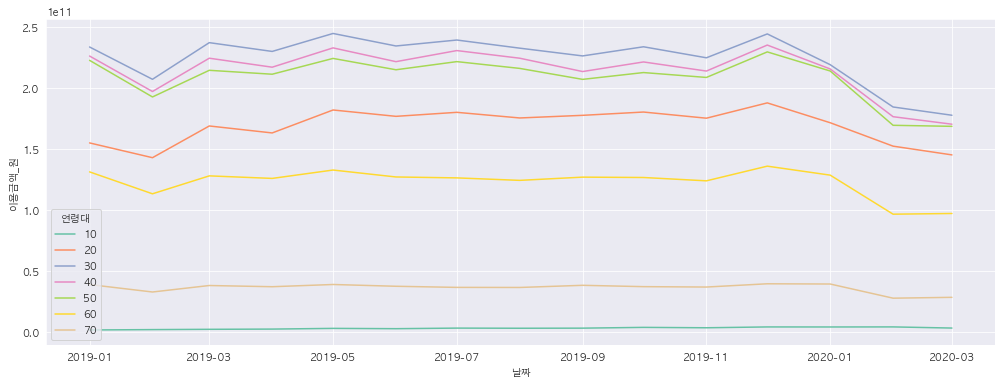

In [71]:
plt.figure(figsize=(17,6))
sns.lineplot(x='날짜', y='이용금액_원', data=df_date, palette='Set2', hue='연령대')

### 2020년 1월부터 코로나로 인한 매출 급감이 일어난 것으로 보여진다.

In [37]:
df_date_2 = df_seoul2.groupby(['날짜'], as_index = False).sum()

In [38]:
df_date_2

,날짜,년월,연령대,이용금액_원,외부인의_결제여부
0,2019-01-01,85362127592,15991900,1008669894795,15152
1,2019-02-01,81803421928,15248310,887162863285,14955
2,2019-03-01,86817078582,16184900,1012627085366,15216
3,2019-04-01,85803748592,15986570,986259775631,15125
4,2019-05-01,89814612580,16654930,1057879226251,15374
5,2019-06-01,87675055722,16280790,1014410284692,15267
6,2019-07-01,87789769321,16237880,1037150538702,15308
7,2019-08-01,88326471772,16344370,1011825174305,15291
8,2019-09-01,85569841836,15809710,992187139385,15244
9,2019-10-01,87977032840,16267970,1015079007773,15273


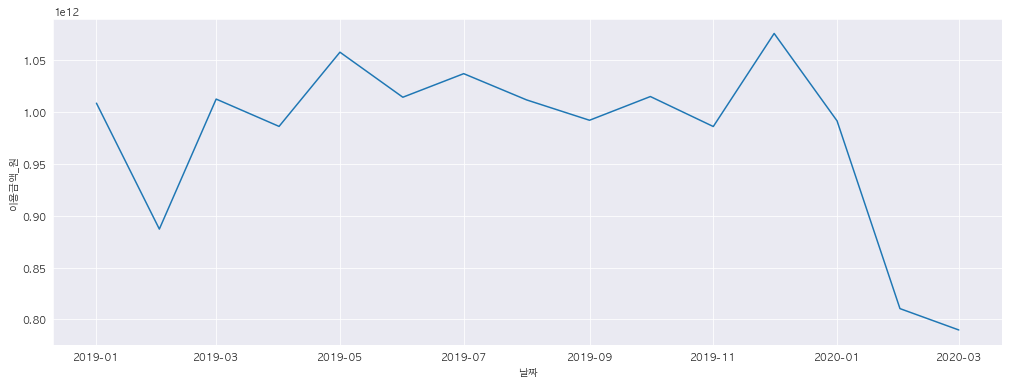

In [72]:
plt.figure(figsize=(17,6))
sns.lineplot(x='날짜', y='이용금액_원', data=df_date_2)

In [42]:
df_class_count_3 = df_class_count_2.sort_values(by='이용금액_원', ascending=False)

In [43]:
card_sidos = df_class_count_3['카드이용지역'].value_counts().index
card_sidos

Index(['강서구', '서초구', '구로구', '강남구', '영등포구', '용산구', '중구', '노원구', '금천구', '송파구',
       '마포구', '종로구', '광진구', '서대문구', '양천구', '관악구', '은평구', '동작구', '동대문구', '강북구',
       '중랑구', '강동구', '성동구', '도봉구', '성북구'],
      dtype='object')

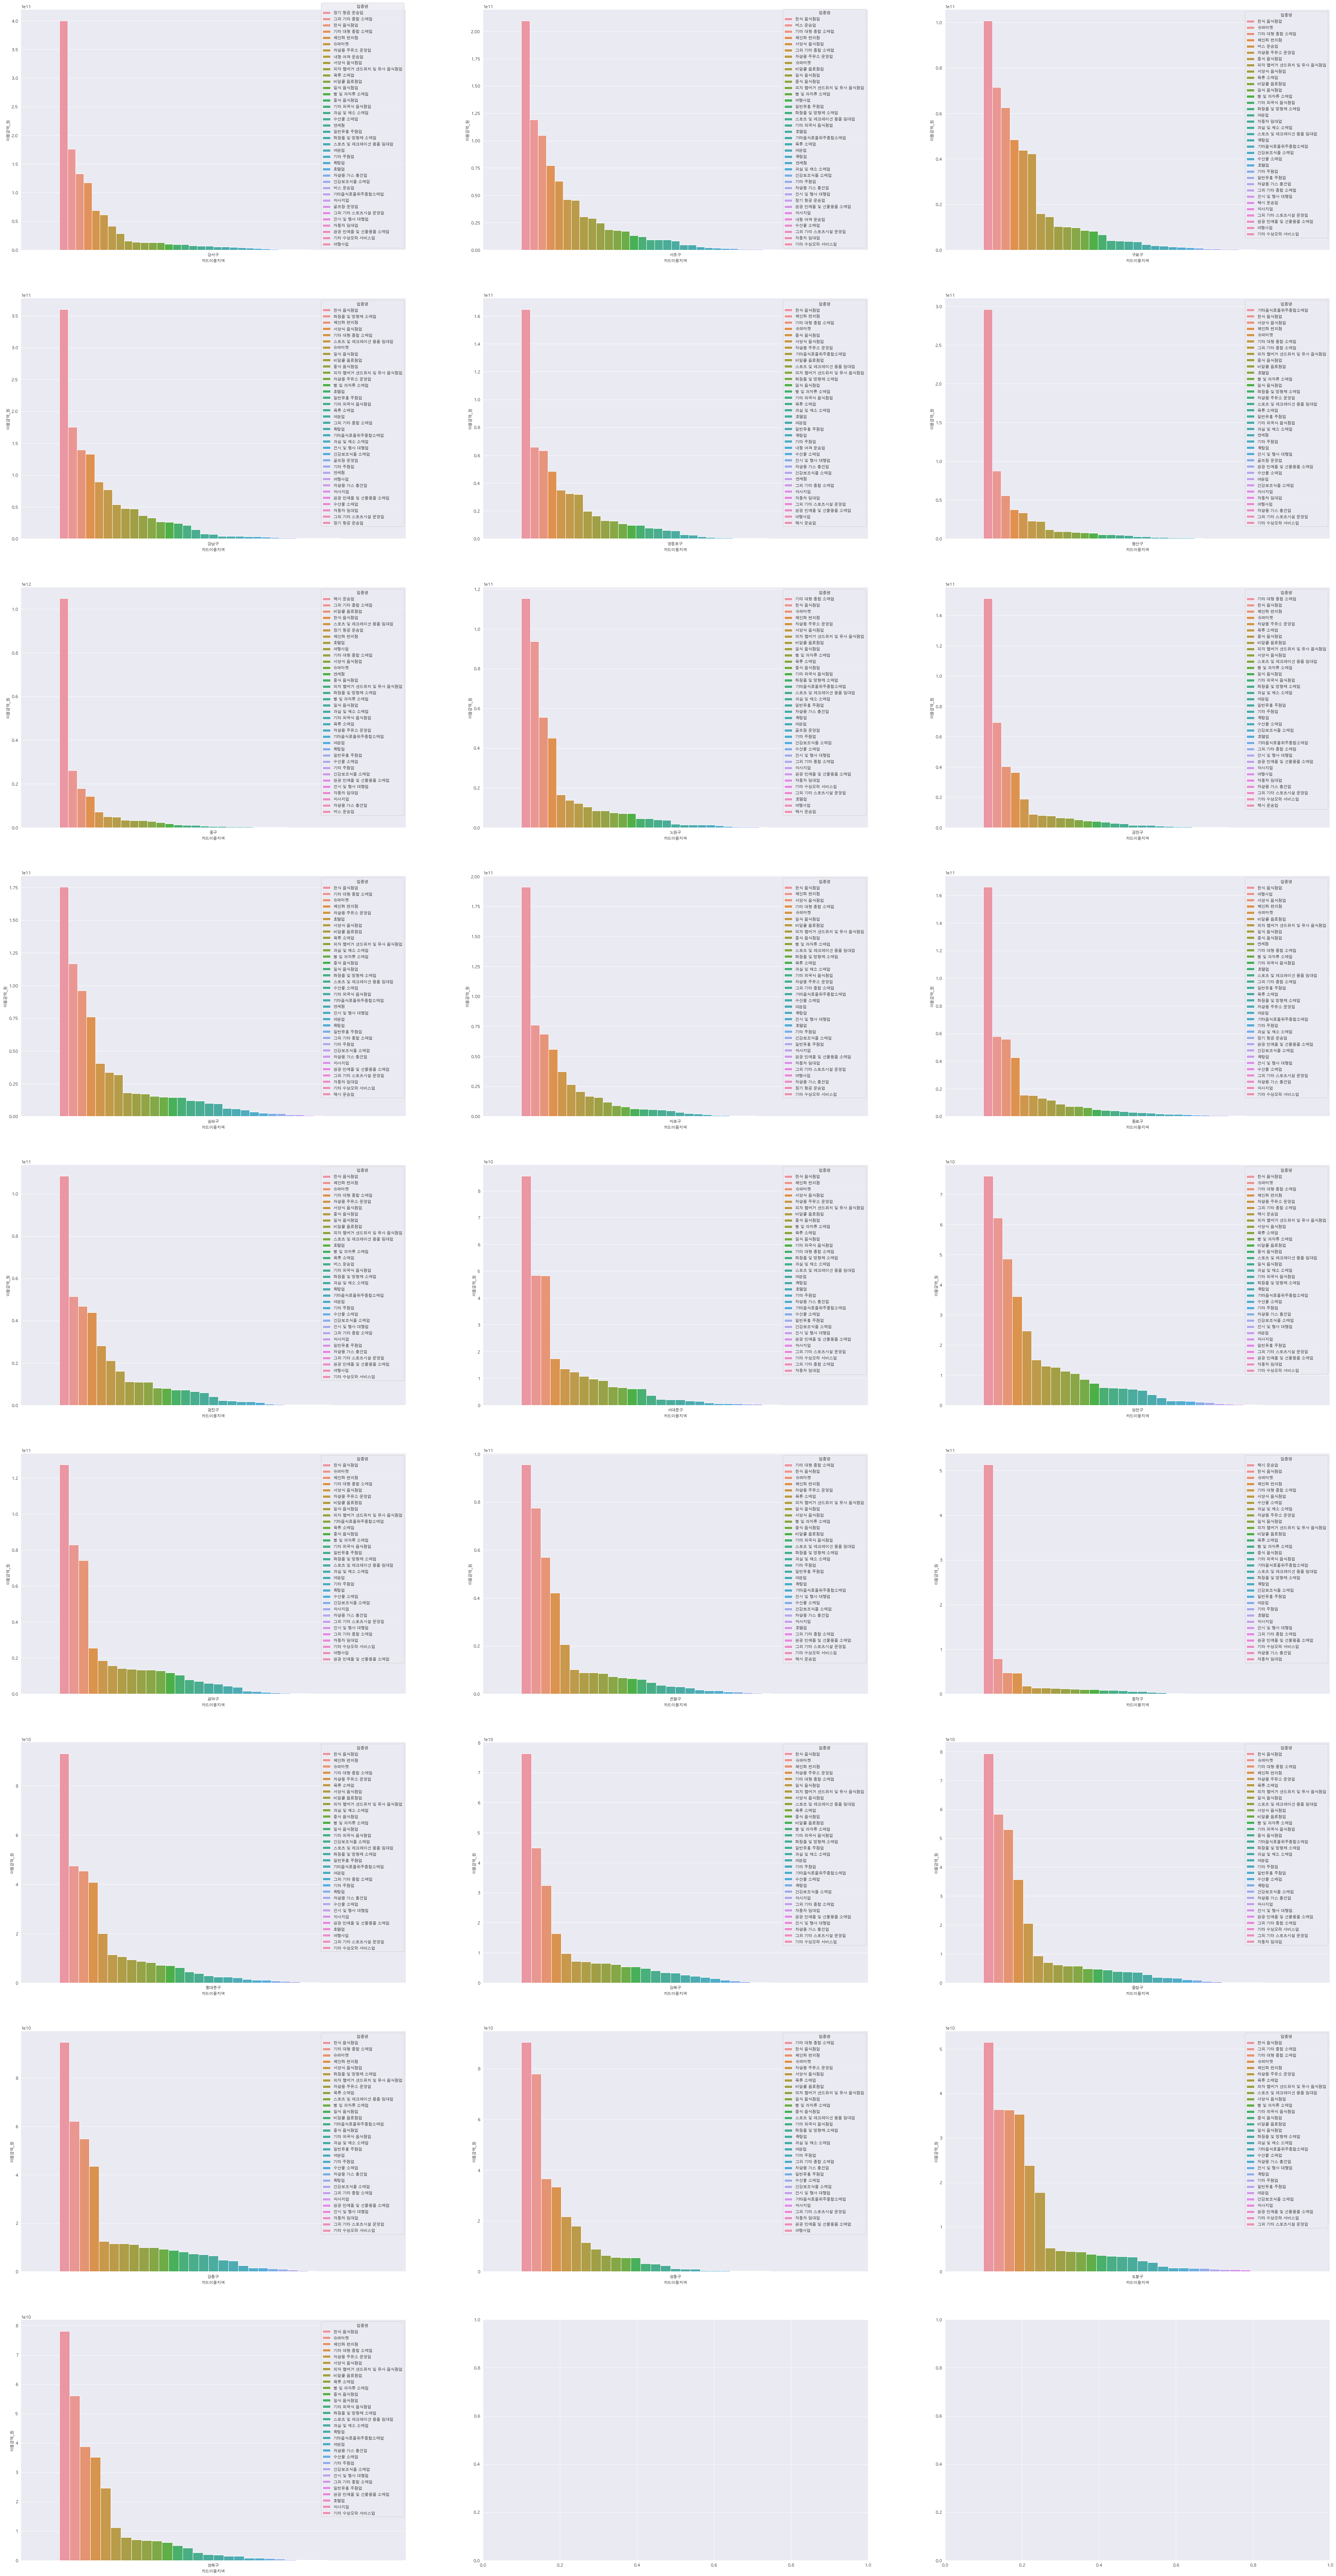

In [75]:
card_sidos = df_class_count_3['카드이용지역'].value_counts().index

fig , axes = plt.subplots(9,3)
axx = axes.flatten()
fig.set_size_inches(60,120)
i = 0

for card_sido in card_sidos:
    plot_data = df_class_count_3[df_class_count_3['카드이용지역'] == card_sido]
    sns.barplot(data = plot_data, x = '카드이용지역', y = '이용금액_원', hue = '업종명',ci = None, ax = axx[i])
    i += 1

In [45]:
df_sex_sum = df_seoul2.groupby(['성별'], as_index = False).sum()

In [46]:
df_sex_sum

,성별,년월,연령대,이용금액_원,외부인의_결제여부
0,F,588212073101,107250260,6486443203240,111712
1,M,675728238671,126848030,8190687845791,115252


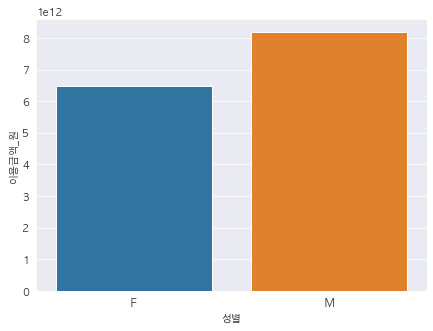

In [47]:
plt.figure(figsize=(7,5))
sns.barplot(x='성별', y='이용금액_원', data=df_sex_sum)

In [50]:
df_date_location = df_seoul2.groupby(['날짜','카드이용지역'], as_index = False).sum()

In [51]:
df_date_location

,날짜,카드이용지역,년월,연령대,이용금액_원,외부인의_결제여부
0,2019-01-01,강남구,6334643875,1184330,94646532529,652
1,2019-01-01,강동구,2112288262,411190,26733934672,624
2,2019-01-01,강북구,1655386299,314320,16614309782,553
3,2019-01-01,강서구,4723473895,925620,83140374136,761
4,2019-01-01,관악구,3965739442,715020,32428425450,636
...,...,...,...,...,...,...
370,2020-03-01,용산구,3335271533,584980,39526009716,500
371,2020-03-01,은평구,1296253251,246370,22862611635,558
372,2020-03-01,종로구,2504029188,463270,17104632171,486
373,2020-03-01,중구,5246219913,974180,102441348492,912


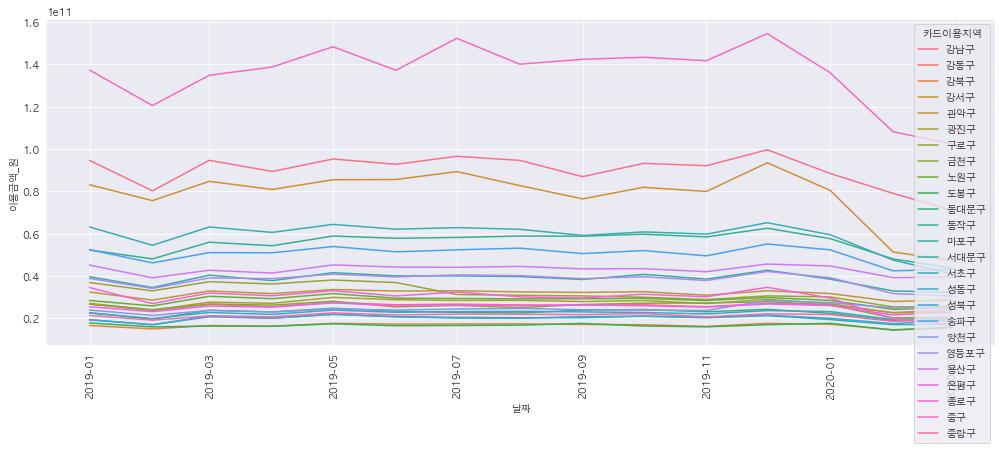

In [76]:
plt.figure(figsize=(17,6))
plt.xticks(rotation=90)
sns.lineplot(x='날짜', y='이용금액_원', data=df_date_location, hue='카드이용지역')

In [55]:
df_date_location_foreign = df_seoul2.groupby(['날짜','외부인의_결제여부'], as_index = False).sum()

In [56]:
df_date_location_foreign

,날짜,외부인의_결제여부,년월,연령대,이용금액_원
0,2019-01-01,0,82302923640,15397220,648380890171
1,2019-01-01,1,3059203952,594680,360289004624
2,2019-02-01,0,78783977518,14662630,566455589238
3,2019-02-01,1,3019444410,585680,320707274047
4,2019-03-01,0,83744922534,15589500,650944802372
5,2019-03-01,1,3072156048,595400,361682282994
6,2019-04-01,0,82749950592,15393790,632822664762
7,2019-04-01,1,3053798000,592780,353437110869
8,2019-05-01,0,86710525110,16054770,679420562944
9,2019-05-01,1,3104087470,600160,378458663307


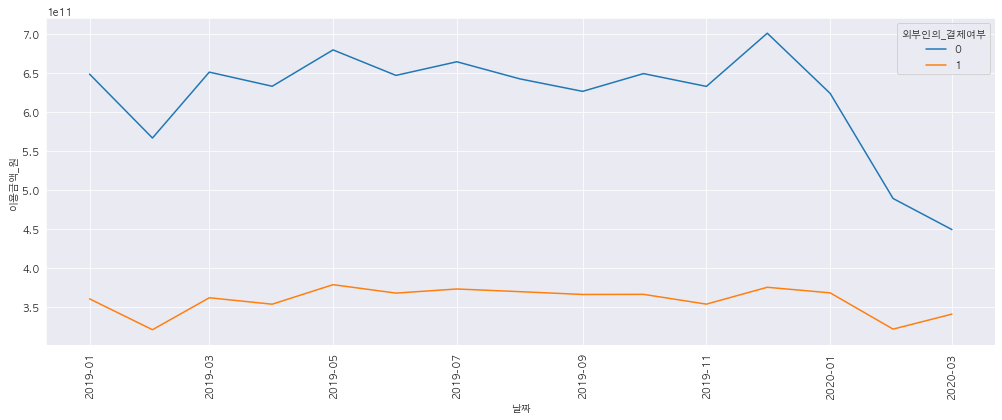

In [77]:
plt.figure(figsize=(17,6))
plt.xticks(rotation=90)
sns.lineplot(x='날짜', y='이용금액_원', data=df_date_location_foreign, hue='외부인의_결제여부')
# 같은 지역사람보다 타지역에서 온 사람들이 소비가 활발하다.